<a href="https://colab.research.google.com/github/23005/EU_M_Math/blob/main/Chap8_Ex_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [ ]:
import requests, zipfile, io
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


In [ ]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

In [ ]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [ ]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [ ]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

In [ ]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011407757737461138

In [ ]:
def calc_entropy(p):
  return - (p * np.log2(p) + (1 - p)* np.log(1 - p) )

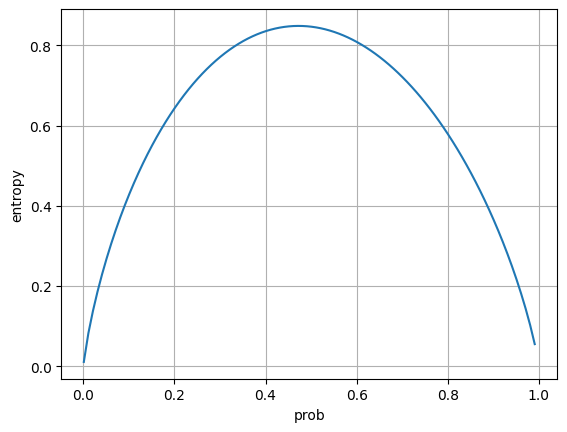

In [ ]:
p = np.arange(0.001, 0.999, 0.01)

plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [ ]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [ ]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピー初期値:{:.3f}'.format(entropy_init))

毒キノコデータのエントロピー初期値:0.999


In [ ]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [ ]:
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c0:{:.3f}'.format(entropy_c0))

entropy_c0:0.999


In [ ]:
p1 = 32 / (32+12)
p2 = 1 - p1
entropy_c1 = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c1:{:.3f}'.format(entropy_c1))

entropy_c1:0.845


In [ ]:
entropy_after = (4176 + 3904)/8124 * entropy_c0 + (32 + 12)/8124 * entropy_c1
print('データ分割後の平均エントロピー:{:.3f}'.format(entropy_after))

データ分割後の平均エントロピー:0.998


In [ ]:
print('変数cap_colorの分割によって得られる情報利得:{:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得:0.001


In [ ]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [ ]:
p1 = 4208 / (4208 + 2188)
p2 = 1 - p1
entropy_b0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))

p1 = 0 / (0+1728)
p2 = 1 - p1
entropy_b1 = - (p2 * np.log2(p2))

entropy_after = (4208 + 2188)/8124 * entropy_b0 + (0 + 1728)/8124 * entropy_b1
print('変数gill_colorの分割によって得られる情報利得:{:.3f}'.format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得:0.269


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop(['flg'], axis=1)
y = mushroom_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.883
正解率(test):0.894


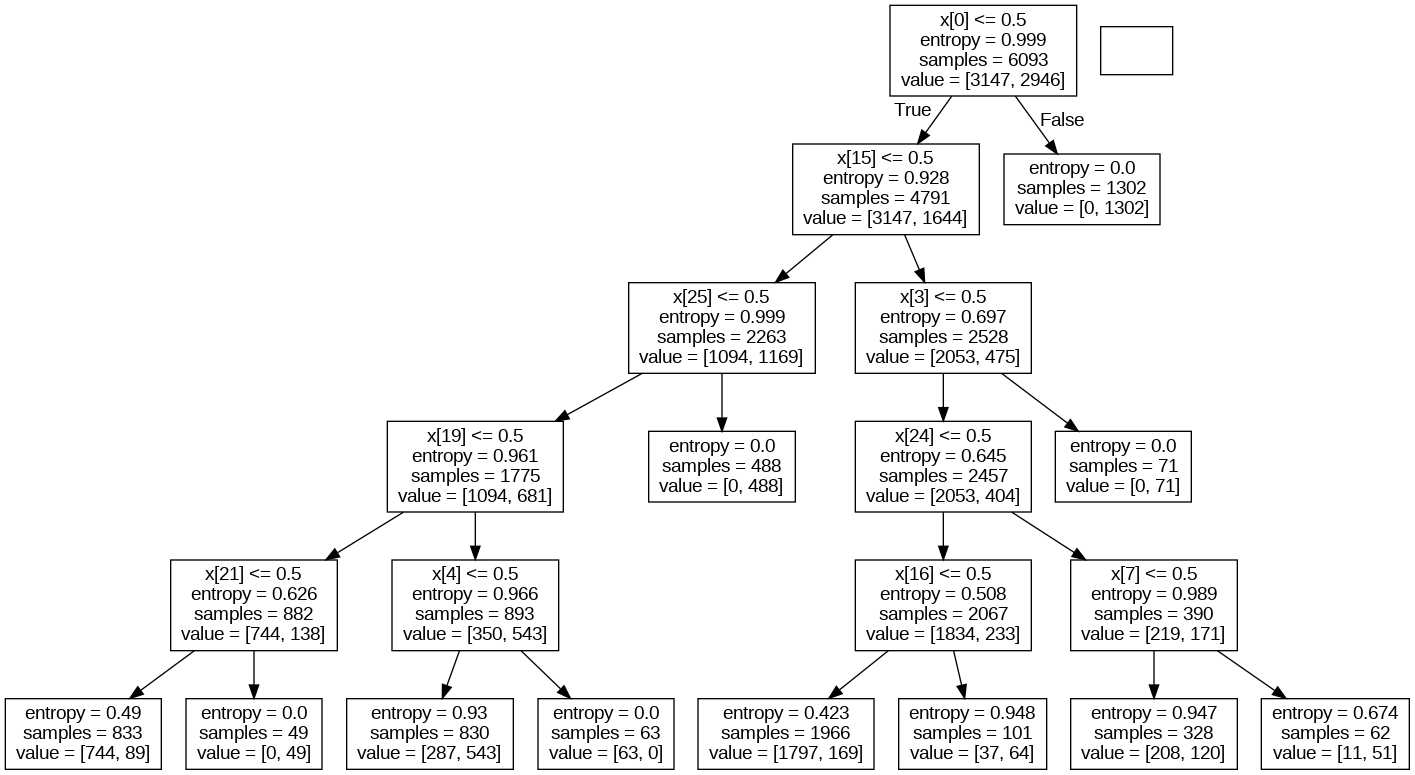

In [ ]:
from sklearn import tree
import pydotplus

from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
#Ex-05
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))


正解率(train):1.000
正解率(test):0.940


In [49]:
#深さ変更
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.979
正解率(test):0.937


In [52]:
#RandomForestClassifierに置き換え
from sklearn.ensemble import RandomForestClassifier

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.996
正解率(test):0.944
